In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download('wordnet')
nltk.data.path.append("/Users/evancarr/nltk_data")
nltk.download('all')

print(nltk.data.find("tokenizers/punkt"))

[nltk_data] Downloading package punkt to /Users/evancarr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evancarr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evancarr/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evancarr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/evancarr/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/evancarr/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading packa

/Users/evancarr/nltk_data/tokenizers/punkt/PY3


[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/evancarr/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/evancarr/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/evancarr/nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [2]:
with open("cleaned_20th_century_text.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [3]:
from nltk.tokenize import word_tokenize

# Tokenize the words
words = word_tokenize(text.lower())  # Convert to lowercase and tokenize

In [4]:
# Ensure tokenization works fine by printing a sample of the tokens
print(words[:20])  # Print first 20 words to check if tokenization is working

['contents', 'current', 'events', 'random', 'article', 'about', 'wikipedia', 'contact', 'us', 'learn', 'to', 'edit', 'community', 'portal', 'recent', 'changes', 'special', 'pages', 'donate', 'create']


In [5]:
# Count word occurrences
word_counts = Counter(words)

# Show the most common words
common_words = word_counts.most_common(10)

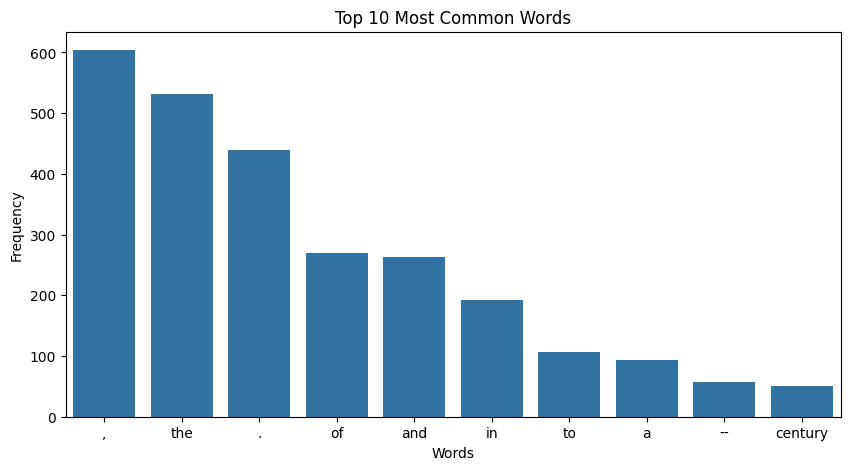

In [6]:
# Plotting the results of the bar plot 
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words")
plt.show()

In [7]:
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word not in stop_words and word.isalnum()]  # Remove stopwords & punctuation
filtered_word_counts = Counter(filtered_words).most_common(10)

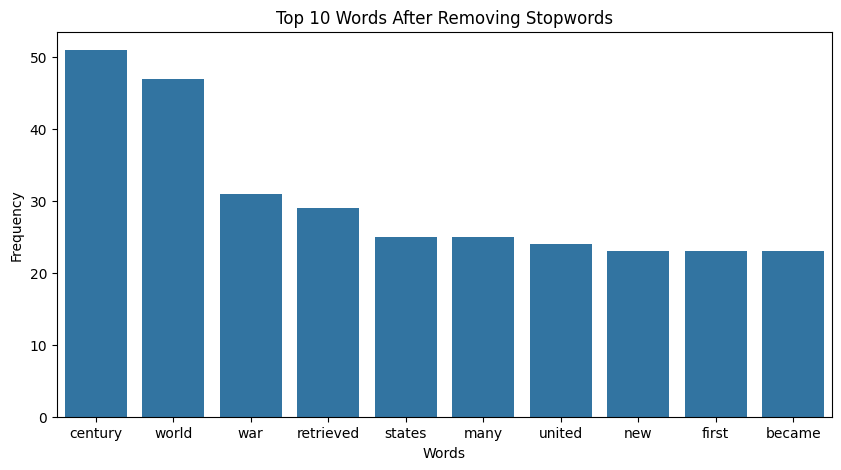

In [8]:
# Plot the filtered common words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in filtered_word_counts], y=[word[1] for word in filtered_word_counts])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Words After Removing Stopwords")
plt.show()

## In the first graph there are punctuation and stopwords, by removing them the next graph gives us more relevant information 
### Century became the most used word in the second graph whereas it was the least used in the first graph

In [9]:
blob = TextBlob(text)
tags = blob.tags  # Get POS tagging
print(tags[:20])  # Show first 20 tagged words

[('Contents', 'NNS'), ('Current', 'JJ'), ('events', 'NNS'), ('Random', 'JJ'), ('article', 'NN'), ('About', 'IN'), ('Wikipedia', 'NNP'), ('Contact', 'NNP'), ('us', 'PRP'), ('Learn', 'NNP'), ('to', 'TO'), ('edit', 'VB'), ('Community', 'NNP'), ('portal', 'JJ'), ('Recent', 'NNP'), ('changes', 'NNS'), ('Special', 'NNP'), ('pages', 'NNS'), ('Donate', 'NNP'), ('Create', 'NNP')]


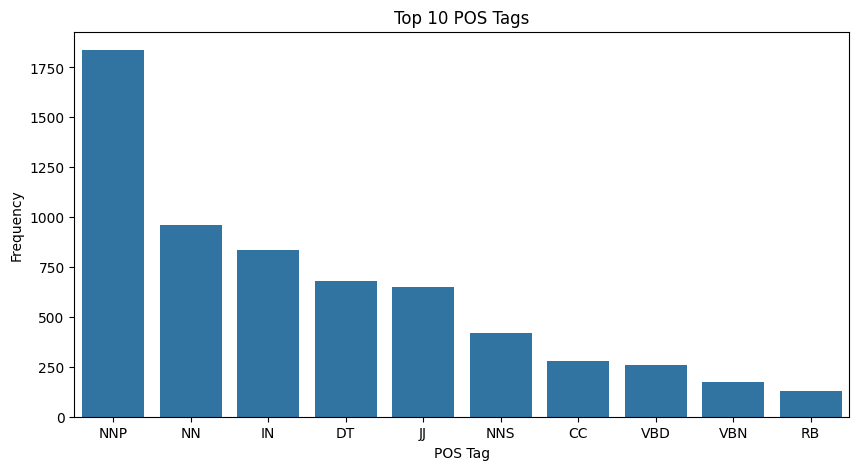

In [10]:
pos_counts = Counter(tag[1] for tag in tags)
common_pos = pos_counts.most_common(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[pos[0] for pos in common_pos], y=[pos[1] for pos in common_pos])
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.title("Top 10 POS Tags")
plt.show()

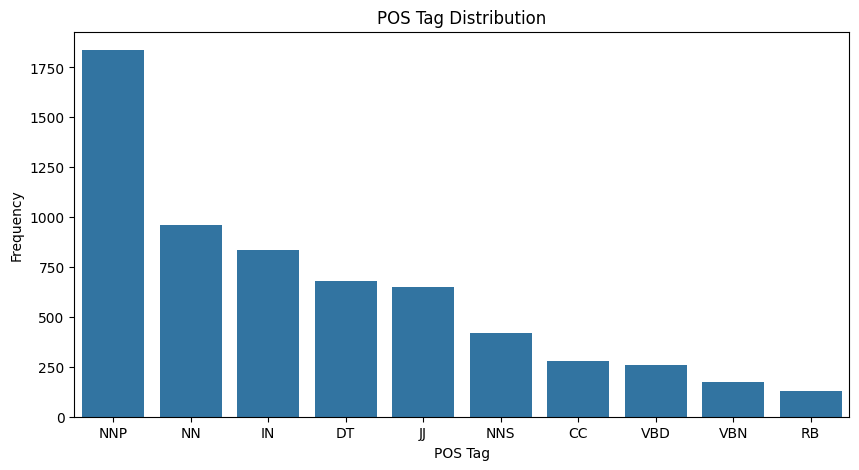

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=[pos[0] for pos in common_pos], y=[pos[1] for pos in common_pos])
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.title("POS Tag Distribution")
plt.show()

In [12]:
# Filter by type
nouns = [word for word, pos in tags if pos.startswith("NN")]
verbs = [word for word, pos in tags if pos.startswith("VB")]
adjectives = [word for word, pos in tags if pos.startswith("JJ")]

In [13]:
# Count
noun_counts = Counter(nouns).most_common(15)
verb_counts = Counter(verbs).most_common(15)
adj_counts = Counter(adjectives).most_common(15)

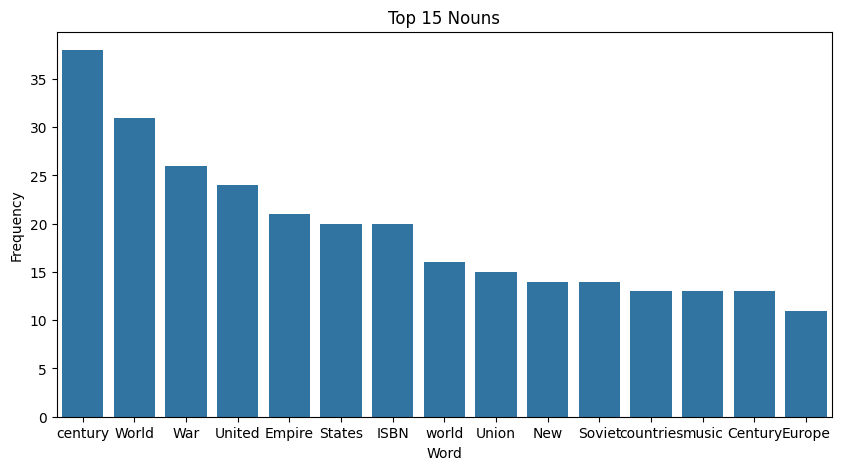

In [14]:
# Function to plot
def plot_pos(data, title):
    plt.figure(figsize=(10,5))
    sns.barplot(x=[word[0] for word in data], y=[word[1] for word in data])
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_pos(noun_counts, "Top 15 Nouns")

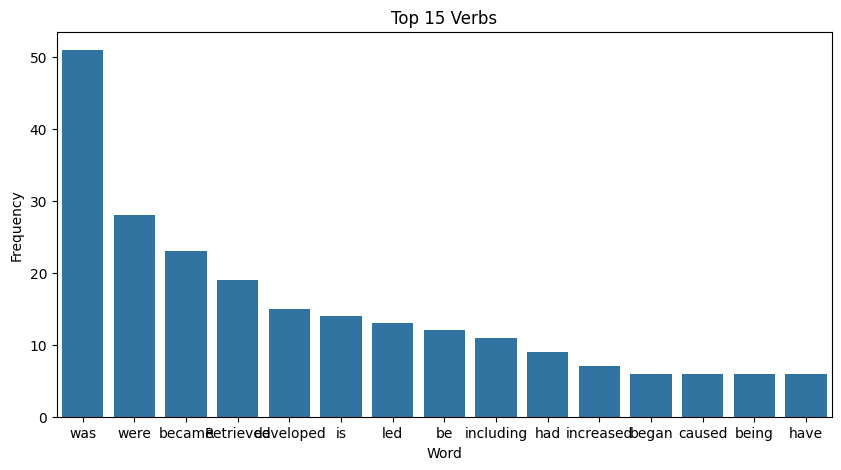

In [15]:
plot_pos(verb_counts, "Top 15 Verbs")

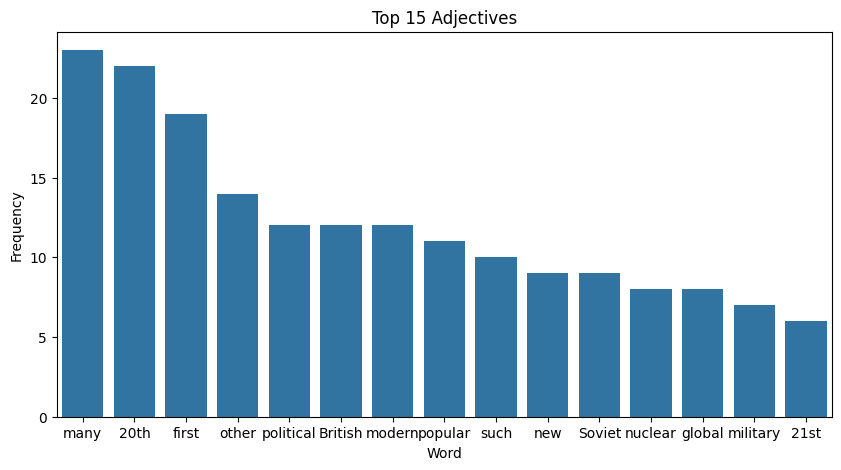

In [16]:
plot_pos(adj_counts, "Top 15 Adjectives")

## Nouns: Most of the nouns are regarding countries, times, and places

## Verbs: The past tense is used regularly 

## Adj: The theme of politics and war is prevalent

In [17]:
# Example list of countries (add more if needed)
countries = ["USA", "Germany", "France", "China", "Russia", "India", "Japan", "UK", "Canada", "Italy"]

# Count occurrences
country_counts = {country: text.lower().count(country.lower()) for country in countries}
country_df = pd.DataFrame(list(country_counts.items()), columns=["Country", "Mentions"])

print(country_df)

   Country  Mentions
0      USA         5
1  Germany         5
2   France         3
3    China        11
4   Russia        10
5    India         4
6    Japan         7
7       UK         5
8   Canada         1
9    Italy         4


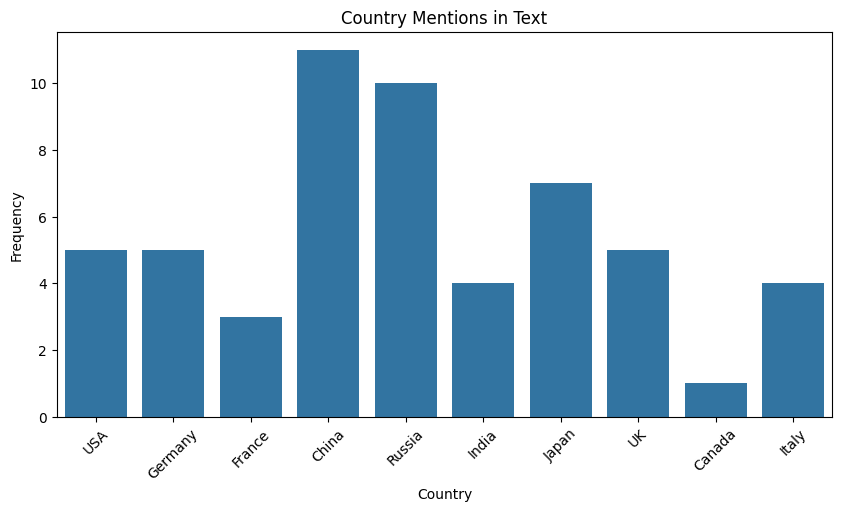

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=country_df["Country"], y=country_df["Mentions"])
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Country Mentions in Text")
plt.xticks(rotation=45)
plt.show()

## The top three mentioned countries are China (11), Russia(10), And Japan(7)